In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import joblib

In [57]:
df = pd.read_csv('data/sleepdata.csv', sep=';', parse_dates=['Start', 'End'])
df['Start time'] = pd.Series([val.time() for val in df['Start']])
df['End time'] = pd.Series([val.time() for val in df['End']])
df['Start time in second'] = df['Start time'].apply(lambda x: (x.hour*60+x.minute)*60 + x.second)
df['End time in second'] = df['End time'].apply(lambda x: (x.hour*60+x.minute)*60 + x.second)
df['Time in bed'] = df['End'] - df['Start']
df['Time in bed'] = df['Time in bed'].astype('timedelta64[s]') # in seconds
# convert sleep quality to float:
df['Sleep quality'] = df['Sleep quality'].apply(lambda x: np.nan if x in ['-'] else x[:-1]).astype(int)
df['Wake up'] = df['Wake up'].replace({':)':2, ':|':1, ':(':0})
df.head()

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps),Start time,End time,Start time in second,End time in second
0,2014-12-29 22:57:49,2014-12-30 07:30:13,100,30744.0,2.0,NaN,59.0,0,22:57:49,07:30:13,82669,27013
1,2014-12-30 21:17:50,2014-12-30 21:33:54,3,964.0,1.0,Stressful day,72.0,0,21:17:50,21:33:54,76670,77634
2,2014-12-30 22:42:49,2014-12-31 07:13:31,98,30642.0,1.0,NaN,57.0,0,22:42:49,07:13:31,81769,26011
3,2014-12-31 22:31:01,2015-01-01 06:03:01,65,27120.0,NaN,NaN,NaN,0,22:31:01,06:03:01,81061,21781
4,2015-01-01 22:12:10,2015-01-02 04:56:35,72,24265.0,2.0,Drank coffee:Drank tea,68.0,0,22:12:10,04:56:35,79930,17795


<AxesSubplot:xlabel='Sleep quality', ylabel='Count'>

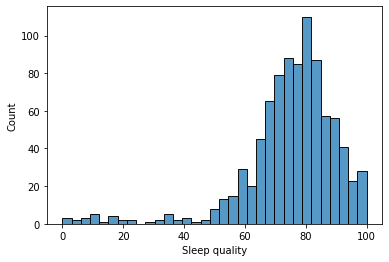

In [58]:
sns.histplot(df, x='Sleep quality')

<AxesSubplot:>

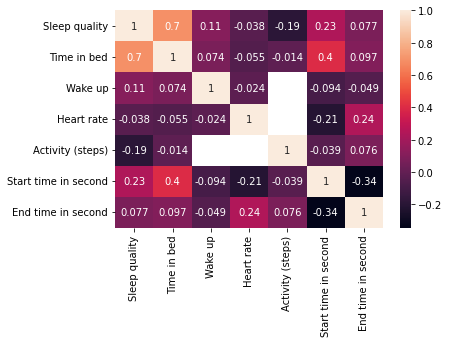

In [59]:
sns.heatmap(df.corr(), annot=True)

In [76]:
df.dropna(inplace=True)
X = df[['Time in bed', 'Start time in second','End time in second','Activity (steps)', 'Wake up']].values
y = df['Sleep quality'].values

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.16310598534545573

In [83]:
y_pred = rf.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

15.06673199148461

In [88]:
filename = 'finalized_model.joblib'
joblib.dump(rf, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.16310598534545573
